In [3]:
#Primer grafa s SDCTD številom
g = Graph([(0,1),(1,2)])
h = g.complement()  

#Primer grafa brez SDCTD števila
m = Graph([(0,1),(1,2),(1,3)])

In [4]:
#Osnivni CLP program, popravi po zgledu Dominacijsko_stevilo
p = MixedIntegerLinearProgram(maximization = False)
x = p.new_variable(binary = True)
p.set_objective(sum([x[v] for v in g]))

for v in g.vertices():
    p.add_constraint(sum((x[w] + x[v]) for w in g.neighbors(v)) >= 1) 

zaustavi = False
    
for v in g.vertices():
    neighbors_complement = h.neighbors(v)  
    if neighbors_complement:  
        p.add_constraint(sum(x[w] for w in neighbors_complement) >= 1)
        
    else:
        print("Slaba, graf nima SDCTD dominacije")  
        zaustavi = True
        break 
        
if not zaustavi == True:
    p.solve()
    x = p.get_values(x)
    print([v for v, i in x.items() if i == 1])  

Slaba, graf nima SDCTD dominacije


In [5]:
#Dominacijska množica, popravi
def SDCTD_mnozica(g):
    h = g.complement()

    p = MixedIntegerLinearProgram(maximization = False)
    x = p.new_variable(binary = True)
    p.set_objective(sum([x[v] for v in g]))

    for v in g.vertices():
        p.add_constraint(sum((x[w] + x[v]) for w in g.neighbors(v)) >= 1) 

    zaustavi = False

    for v in g.vertices():
        neighbors_complement = h.neighbors(v)  
        if neighbors_complement:  
            p.add_constraint(sum(x[w] for w in neighbors_complement) >= 1)

        else:
            print("Slaba, graf nima SDCTD dominacije")  
            zaustavi = True
            break 

    if not zaustavi == True:
        p.solve()
        x = p.get_values(x)
        return([v for v, i in x.items() if i == 1]) 
    else:
        return None

In [6]:
#SDCTD število, popravi
def SDCTD_stevilo(g):
    h = g.complement()

    p = MixedIntegerLinearProgram(maximization = False)
    x = p.new_variable(binary = True)
    p.set_objective(sum([x[v] for v in g]))

    for v in g.vertices():
        p.add_constraint(sum((x[w] + x[v]) for w in g.neighbors(v)) >= 1) 

    zaustavi = False

    for v in g.vertices():
        neighbors_complement = h.neighbors(v)  
        if neighbors_complement:  
            p.add_constraint(sum(x[w] for w in neighbors_complement) >= 1)

        else:
            print("Slaba, graf nima SDCTD dominacije")  
            zaustavi = True
            break 

    if not zaustavi == True:
        p.solve()
        x = p.get_values(x)
        return(sum(1 for i in x.values() if i == 1))
    else:
        return None
 

In [0]:
#Sedaj želimo kodo spremeniti tako, da bo sprejela grafe neke velikosti in nato za vsako vrsto vrnila dominacijsko število. 
#Najdemo pogoj, za katerega ima graf sploh lahko SDCTD število. Vsaj koliko povezav mora imeti graf reda n, da ima sploh lahko SDCTD število.
#Spremeni max_st in min_st tako, da ne bo vrnilo napisov pred resitvijo. Tudi malce polepsaj kodo.



In [4]:
#To je koda za SDCTD število, zgornji kodi popravi!!

def Dominacijsko_stevilo(g):
    h = g.complement()

    p = MixedIntegerLinearProgram(maximization=False)
    x = p.new_variable(binary=True)
    p.set_objective(sum([x[v] for v in g.vertices()]))

    for v in g.vertices():
        neighbors = g.neighbors(v)  
        if neighbors:
            p.add_constraint(sum((x[w] + x[v]) for w in neighbors) >= 1)
        else:
            p.add_constraint(x[v] == 1)
            
    zaustavi = False

    for v in g.vertices():
        neighbors_complement = h.neighbors(v)
        if neighbors_complement:
            p.add_constraint(sum(x[w] for w in neighbors_complement) >= 1)
        else:
            print("Slaba, graf nima SDCTD dominacije")
            zaustavi = True
            break

    if not zaustavi:
            p.solve()  
            x_values = p.get_values(x)  
            prestej_izbrana_vozlisca = sum(1 for i in x_values.values() if i == 1)
            izbrana_vozlisca = [v for v, i in x_values.items() if i == 1]
            #print("Izbrana vozlišča za graf:", izbrana_vozlisca)    
            return prestej_izbrana_vozlisca 
    else:
        return None  



In [45]:
def max_st(n):
    all_graphs = list(graphs(n))
    
    seznam = []
    valid_graphs = []  # This will store graphs that meet SDCTD domination conditions

    for g in all_graphs:
        dom_number = Dominacijsko_stevilo(g)
        
        if dom_number is not None:
            seznam.append(dom_number)
            valid_graphs.append(g)
    
    if not valid_graphs:
        return None  # If no valid graph is found, return None or handle accordingly

    max_value = max(seznam)
    
    # Find all graphs that have the maximum SDCTD domination number
    graphs_with_max = [valid_graphs[i] for i in range(len(valid_graphs)) if seznam[i] == max_value]
    
    # Print all graphs with the maximum SDCTD domination number
    print(f"Graphs with the maximum SDCTD domination number ({max_value}):")
    for g in graphs_with_max:
        g.show()




Slaba, graf nima SDCTD dominacije
Slaba, graf nima SDCTD dominacije
Slaba, graf nima SDCTD dominacije
Slaba, graf nima SDCTD dominacije
Graphs with the maximum SDCTD domination number (4):


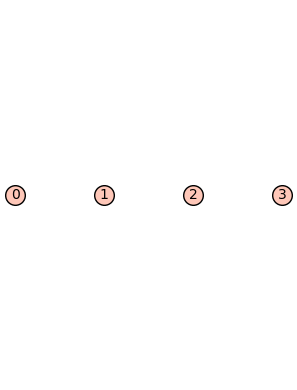

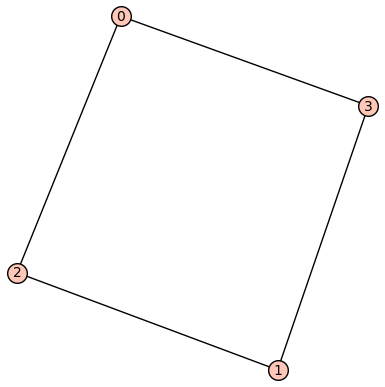

In [46]:
max_st(4)

In [5]:
#Koda seveda ne izpisuje grafov, ki za katere ne obstaja SDCTD dominacijsko število
def min_st(n):
    # Generate all graphs on n vertices
    all_graphs = list(graphs(n))
    
    # List to hold the SDCTD domination numbers of valid graphs
    seznam = []
    valid_graphs = []  # This will store graphs that meet SDCTD domination conditions
    
    # Calculate SDCTD domination number for each graph and validate
    for g in all_graphs:
        dom_number = Dominacijsko_stevilo(g)
        
        # Assuming your function should return None or similar if SDCTD domination is not met
        if dom_number is not None:
            seznam.append(dom_number)
            valid_graphs.append(g)
    
    if not valid_graphs:
        print("No graph satisfies the SDCTD domination condition.")
        return None  # If no valid graph is found, return None or handle accordingly
    
    # Find the minimum SDCTD domination number
    min_value = min(seznam)
    
    # Find all graphs that have the minimum SDCTD domination number
    graphs_with_min = [valid_graphs[i] for i in range(len(valid_graphs)) if seznam[i] == min_value]
    
    # Print all graphs with the minimum SDCTD domination number
    print(f"Graphs with the minimum SDCTD domination number ({min_value}):")
    for g in graphs_with_min:
        g.show()


Slaba, graf nima SDCTD dominacije
Slaba, graf nima SDCTD dominacije
Slaba, graf nima SDCTD dominacije
Slaba, graf nima SDCTD dominacije
Slaba, graf nima SDCTD dominacije
Slaba, graf nima SDCTD dominacije
Slaba, graf nima SDCTD dominacije
Slaba, graf nima SDCTD dominacije
Slaba, graf nima SDCTD dominacije
Slaba, graf nima SDCTD dominacije
Slaba, graf nima SDCTD dominacije
Graphs with the minimum SDCTD domination number (2):


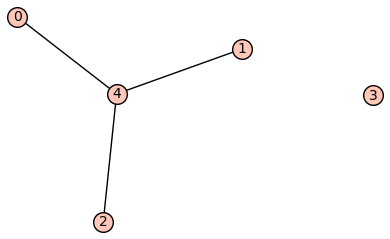

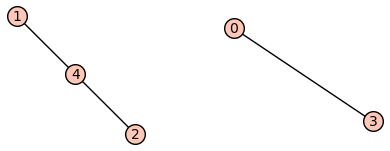

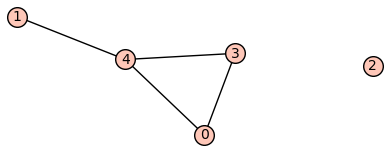

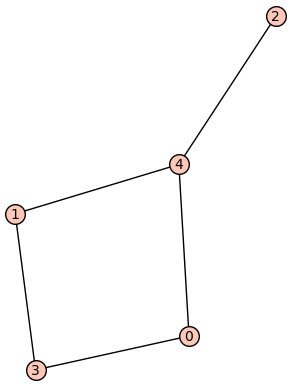

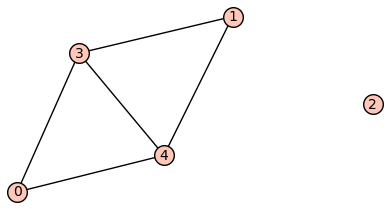

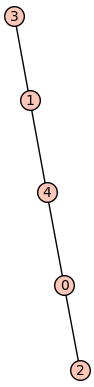

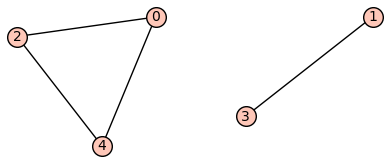

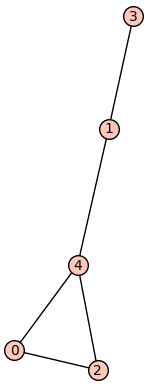

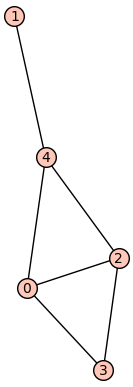

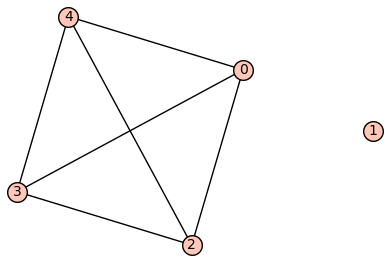

In [7]:
min_st(5)

4


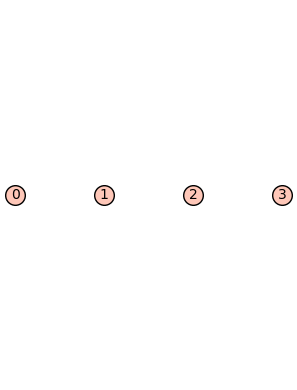

3


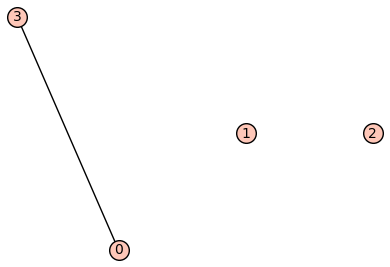

2


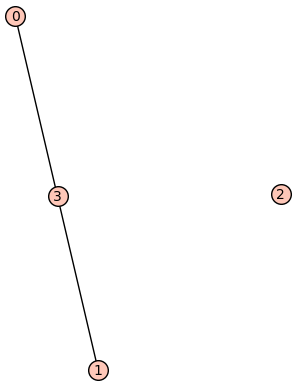

Slaba, graf nima SDCTD dominacije
None


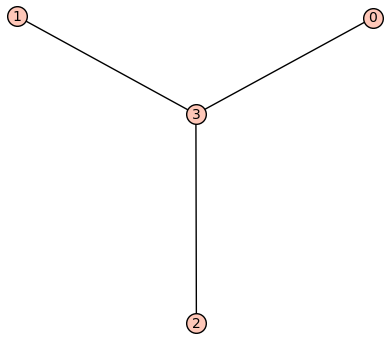

2


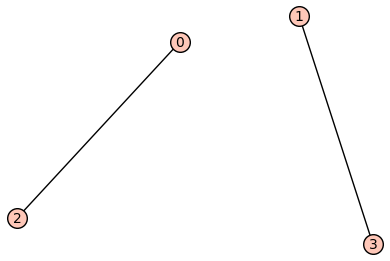

2


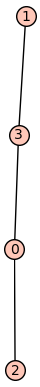

2


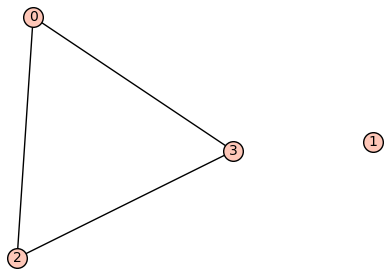

Slaba, graf nima SDCTD dominacije
None


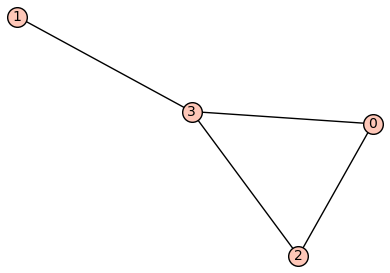

4


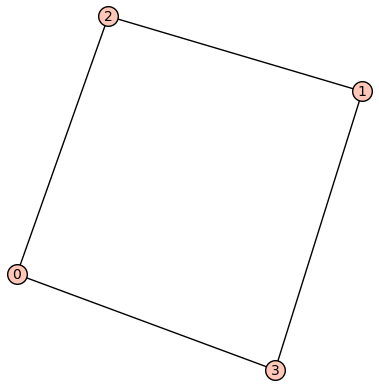

Slaba, graf nima SDCTD dominacije
None


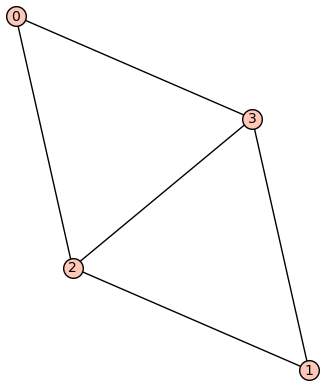

Slaba, graf nima SDCTD dominacije
None


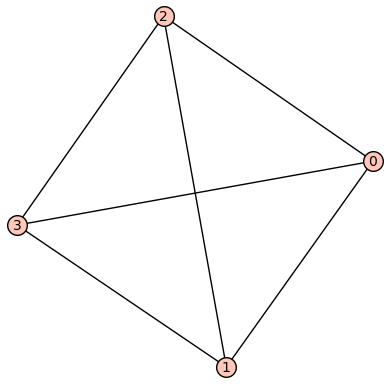

In [8]:

for q in graphs(4):
    print(Dominacijsko_stevilo(q))
    
    q.show()